# Red Wine Quality Prediction Project

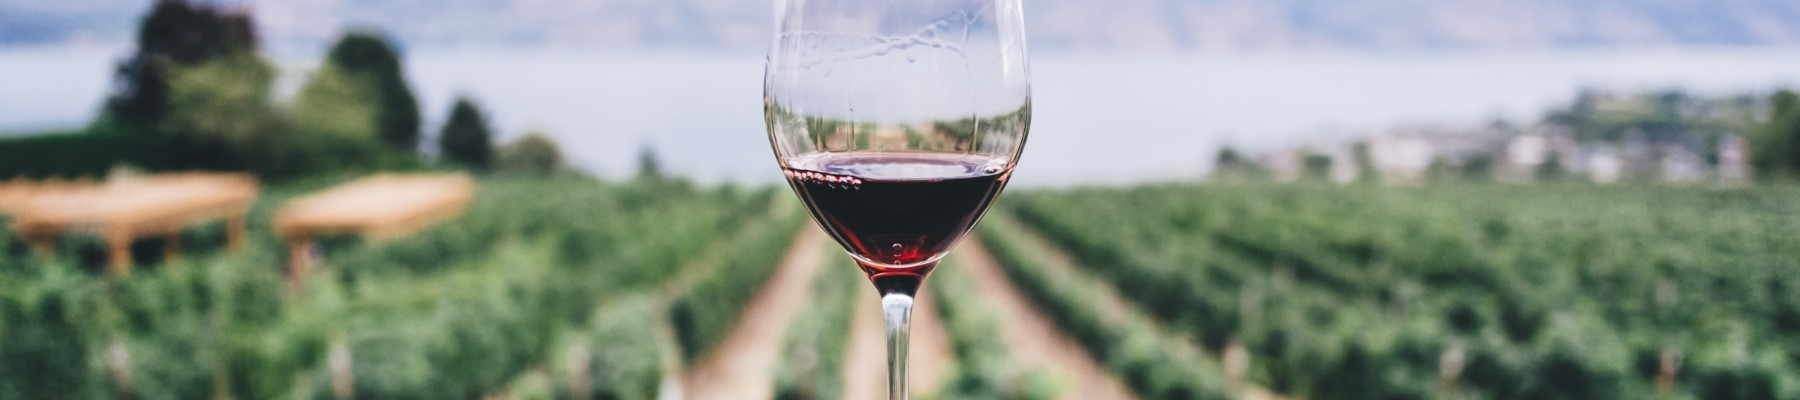

Dataset:

    The dataset contains various information about red and white variants of the Portuguese "Vinho Verde" wine. 


Input variables (based on physicochemical tests):

    1 - fixed acidity  
    2 - volatile acidity  
    3 - citric acid  
    4 - residual sugar  
    5 - chlorides  
    6 - free sulfur dioxide  
    7 - total sulfur dioxide  
    8 - density  
    9 - pH  
    10 - sulphates  
    11 - alcohol  
    
    
Output variable (based on sensory data): 

    quality (score between 0 and 10, with 0 being 'bad quality' and 10 being 'best quality')  



Aim: 

    Analyse the Red Wine Quality dataset  
    Develop a machine learning model to predict wine quality (Classification model)



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [4]:
wine_df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Red%20Wine/winequality-red.csv')
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Data pre-processing & EDA

In [5]:
wine_df.shape

(1599, 12)

In [6]:
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Observations:  
There are no nulls in the dataset.  
The features are in float64 datatype and label is of int64 datatype.

In [9]:
# converting label column to categorical data
quality_label=[]
for i in wine_df.quality:
    if i >=7:
        quality_label.append(1) # good quality
    else:
        quality_label.append(0) # not good quality

In [10]:
wine_df.drop('quality',axis=1,inplace=True)
wine_df['quality_label']=quality_label
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [11]:
wine_df['quality_label'].dtype

dtype('int64')

In [12]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_label
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


Observations:  
The mean and standard deviation are close values in most of the feature columns, so further investigation on data distribution and skewness needs to be done.  
Right skewness is possible in Total sulfur dioxide data as mean > median but needs to be confirmed by data distribution graph.

In [13]:
for i in wine_df.columns:
    print(wine_df[i].value_counts())

fixed acidity
7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: count, Length: 96, dtype: int64
volatile acidity
0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: count, Length: 143, dtype: int64
citric acid
0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: count, Length: 80, dtype: int64
residual sugar
2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: count, Length: 91, dtype: int64
chlorides
0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: count, Length: 153, dtype: int64
free sulfur dioxide
6.0     138
5.0     104
10.0     79
15.0     78
12.0     75


Observations:  
Here, we could see the value of all features which is occuring most frequently.  
Fixed acidity = 7.2  
Volatile acidity = 0.6  
Citric acid = 0  
Residual sugar = 156  
Chlorides = 0.08  
Free sulfur dioxide = 6  
Total sulfur dioxide = 28  
density= 0.99720  
pH = 3.3  
Sulphates = 0.6  
Alcohol = 9.5  
Quality_label = not good (shows data imbalance which will be dealt with later)  

In [14]:
unique=wine_df.nunique()
unique.to_frame(name='Number of Unique Values')

,Number of Unique Values
fixed acidity,96
volatile acidity,143
citric acid,80
residual sugar,91
chlorides,153
free sulfur dioxide,60
total sulfur dioxide,144
density,436
pH,89
sulphates,96


Observations:  
High number of unique values in a column indicates the diversity of data and show uniqueness. Uniqueness is important for better analysis.

In [15]:
# check for duplicates 
dups=wine_df.duplicated()
dups_index=wine_df[dups].index

print(f'Number of duplicates in the dataset : {wine_df.duplicated().sum()}')
print(f'Indices of duplicates in the dataset : {dups_index}')

Number of duplicates in the dataset : 240
Indices of duplicates in the dataset : Index([   4,   11,   27,   40,   65,   76,   91,   93,  102,  105,
       ...
       1520, 1522, 1557, 1560, 1561, 1563, 1564, 1567, 1581, 1596],
      dtype='int64', length=240)


In [16]:
# remove duplicates
wine_df.drop_duplicates(inplace=True)
dups1=wine_df.duplicated().sum()
print('Number of duplicates after cleaning: ',dups1)

Number of duplicates after cleaning:  0


In [17]:
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality_label'],
      dtype='object')

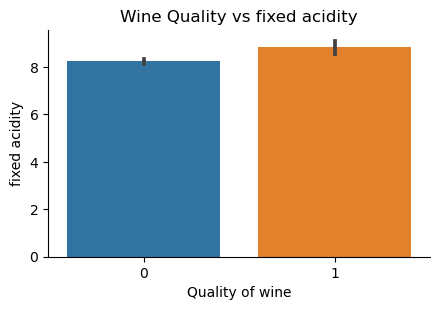

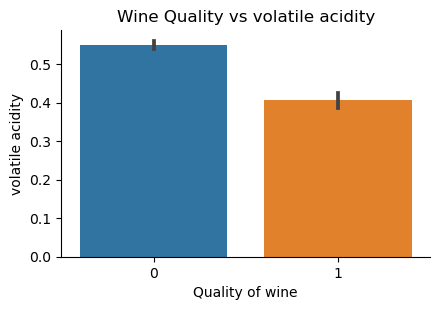

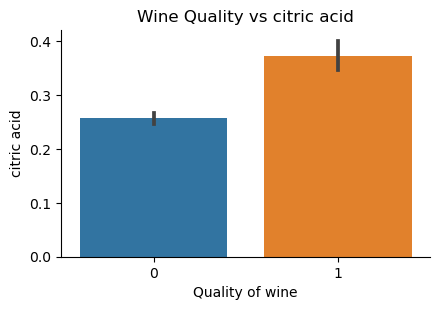

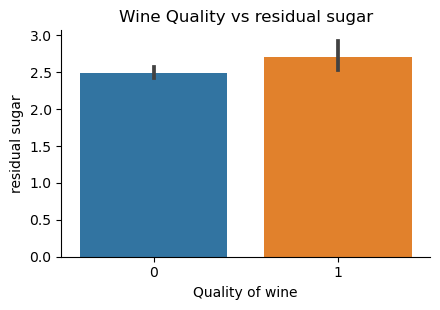

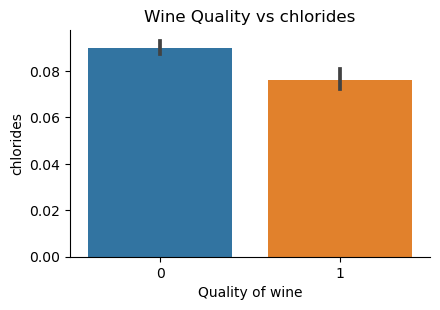

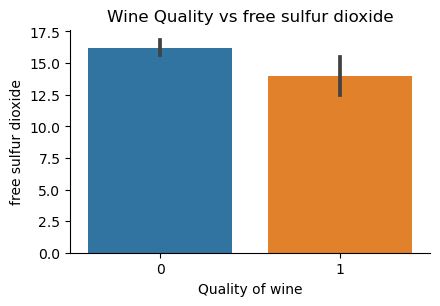

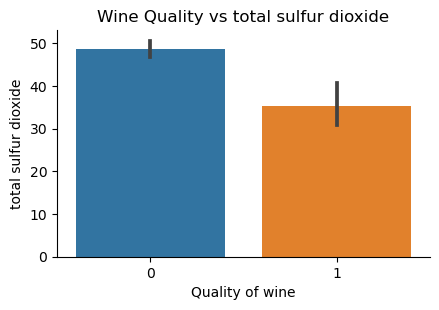

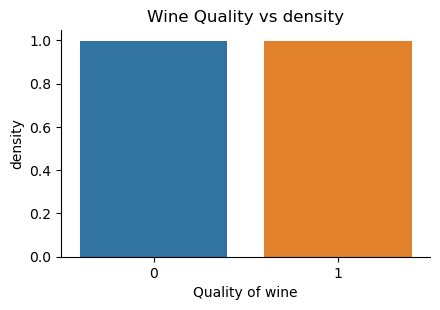

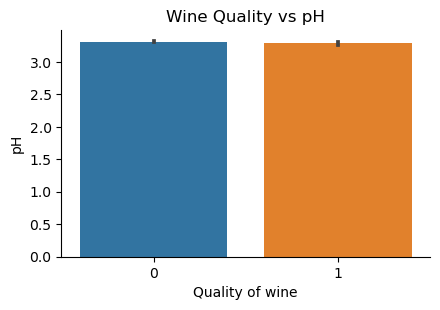

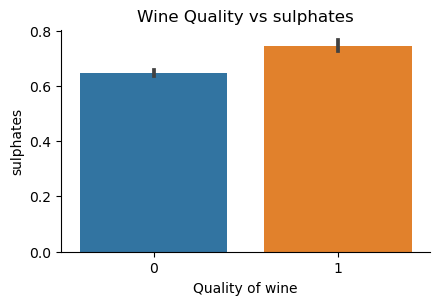

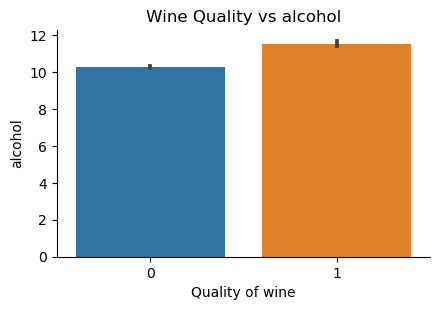

In [18]:
# checking the wine quality with the other wine features
for i in wine_df.columns[:-1]:
    sns.catplot(x='quality_label',y=i,data=wine_df,height=3,aspect=1.5,kind='bar')
    plt.xlabel('Quality of wine')
    plt.ylabel(i)
    plt.title(f'Wine Quality vs {i}')

Observations:  
Volatile acidity, chlorides, free and total sulfur dioxide is comparitively less in good quality wine.

Citric acid, sulphates, alcohol, residual sugar, fixed acidity is comparitively high in good quality wine.

pH, density are independent of wine quality.

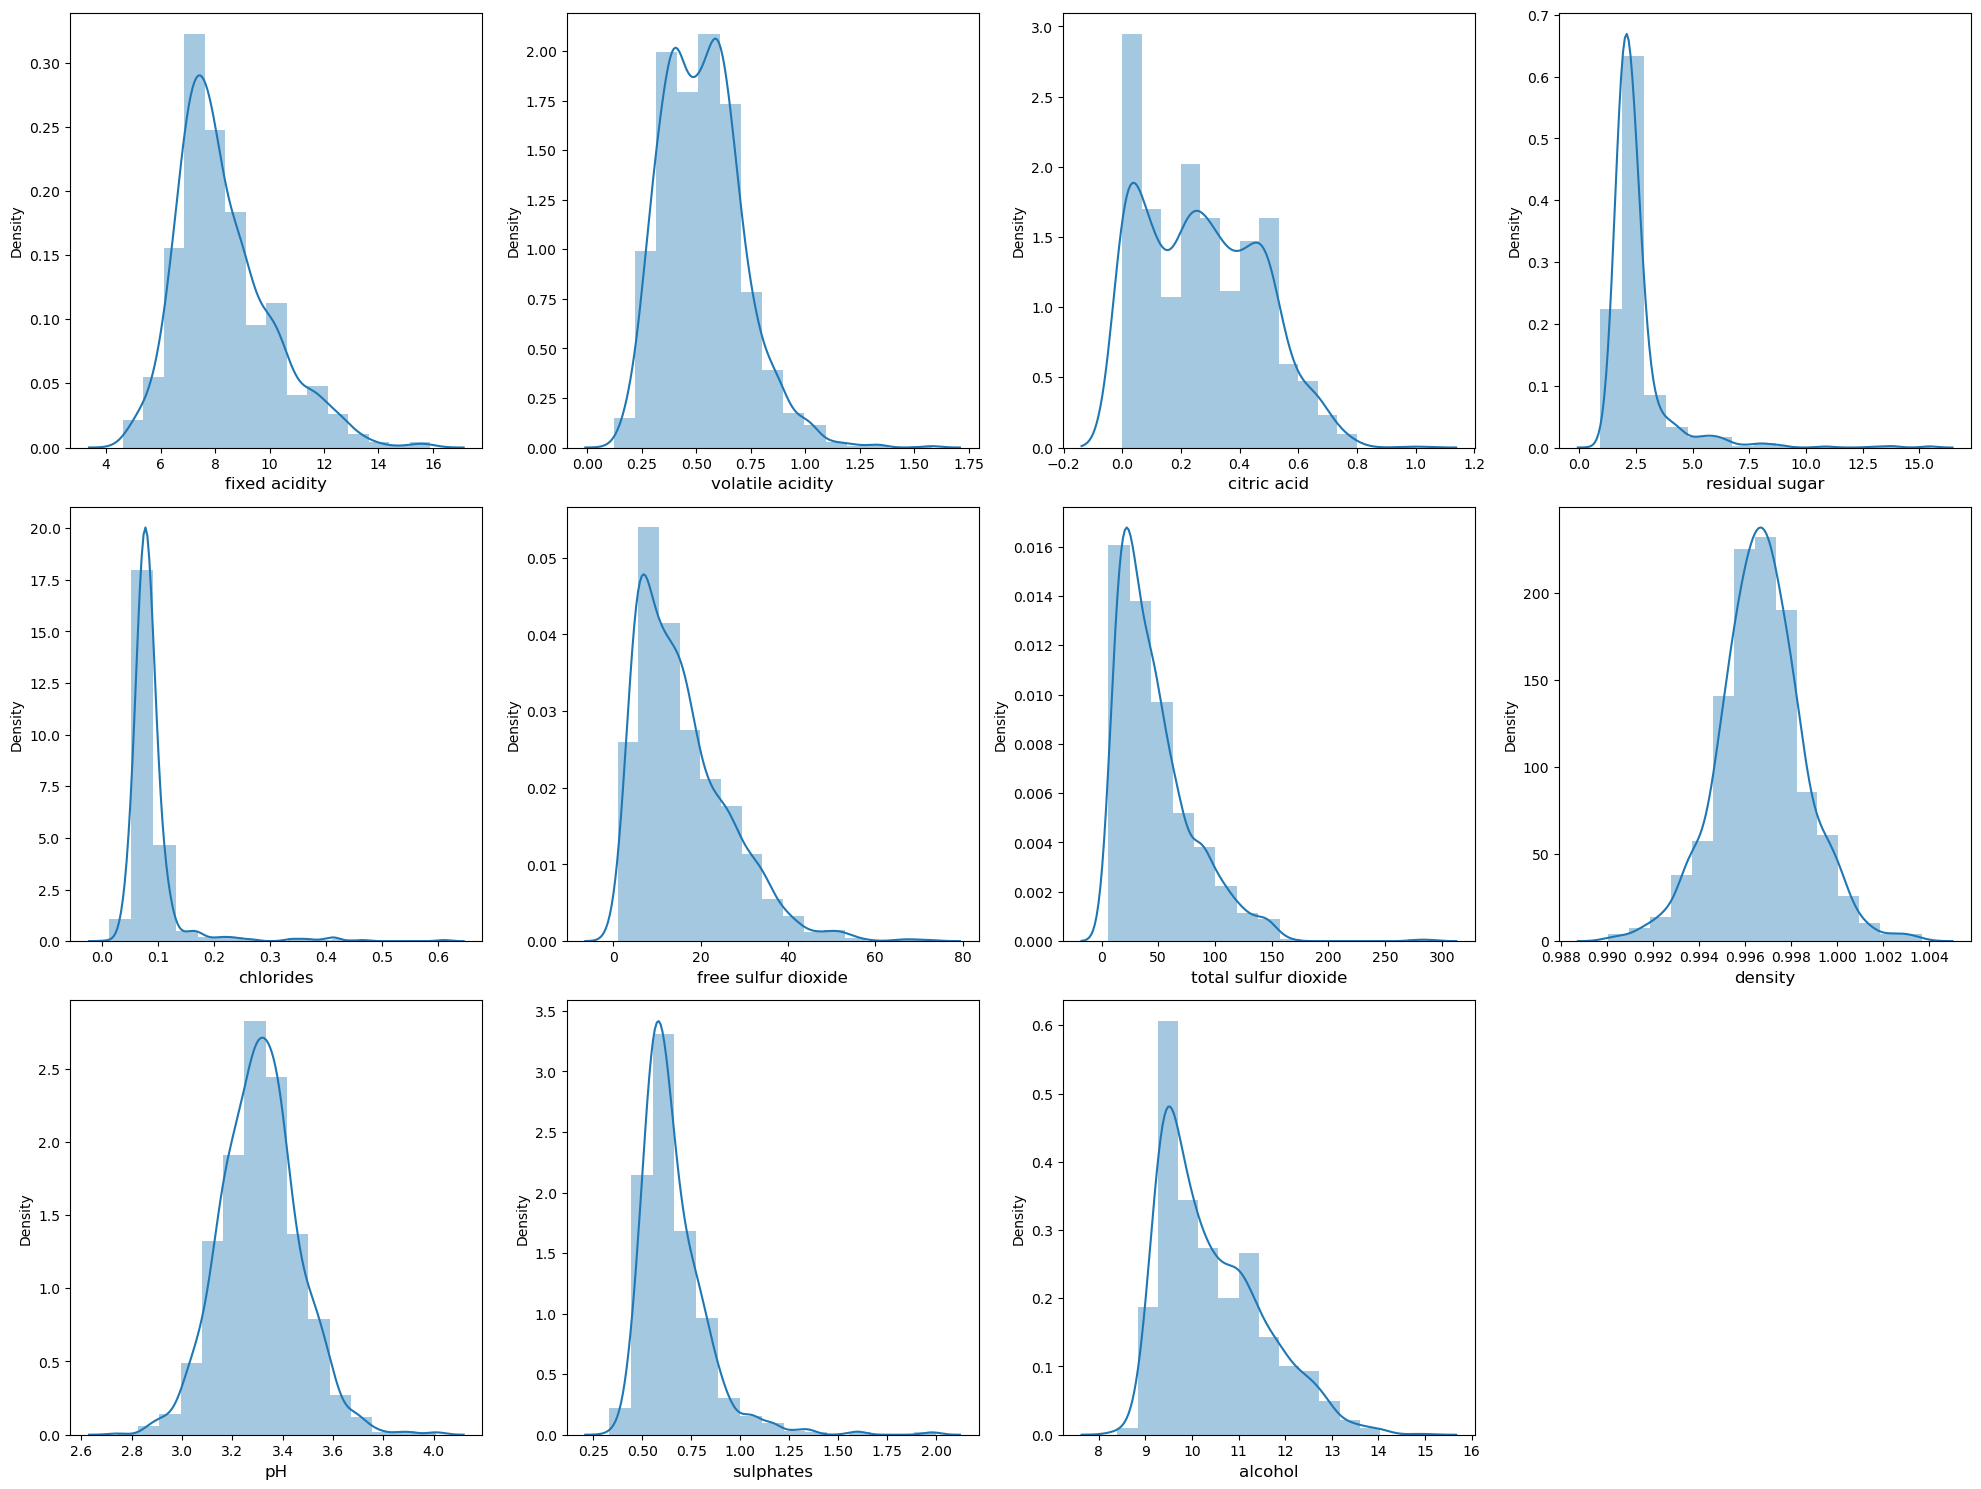

In [19]:
# check data distribution
x=wine_df.drop('quality_label',axis=1)
plt.figure(figsize=(20,15))
plot=1
for col in x:
    if plot<=11:
        ax=plt.subplot(3,4,plot)
        sns.distplot(x[col],bins=15)
        plt.xlabel(col,fontsize=12)
    plot+=1
plt.tight_layout()

Observations:  
Residual sugar, chlorides,free and total sulfur dioxides, and sulphates have slight left skewness.  
Other features seem to be in normal distribution.
Outliers need to be checked in the dataset to see if the left skewness is supported by presence of lower outliers.

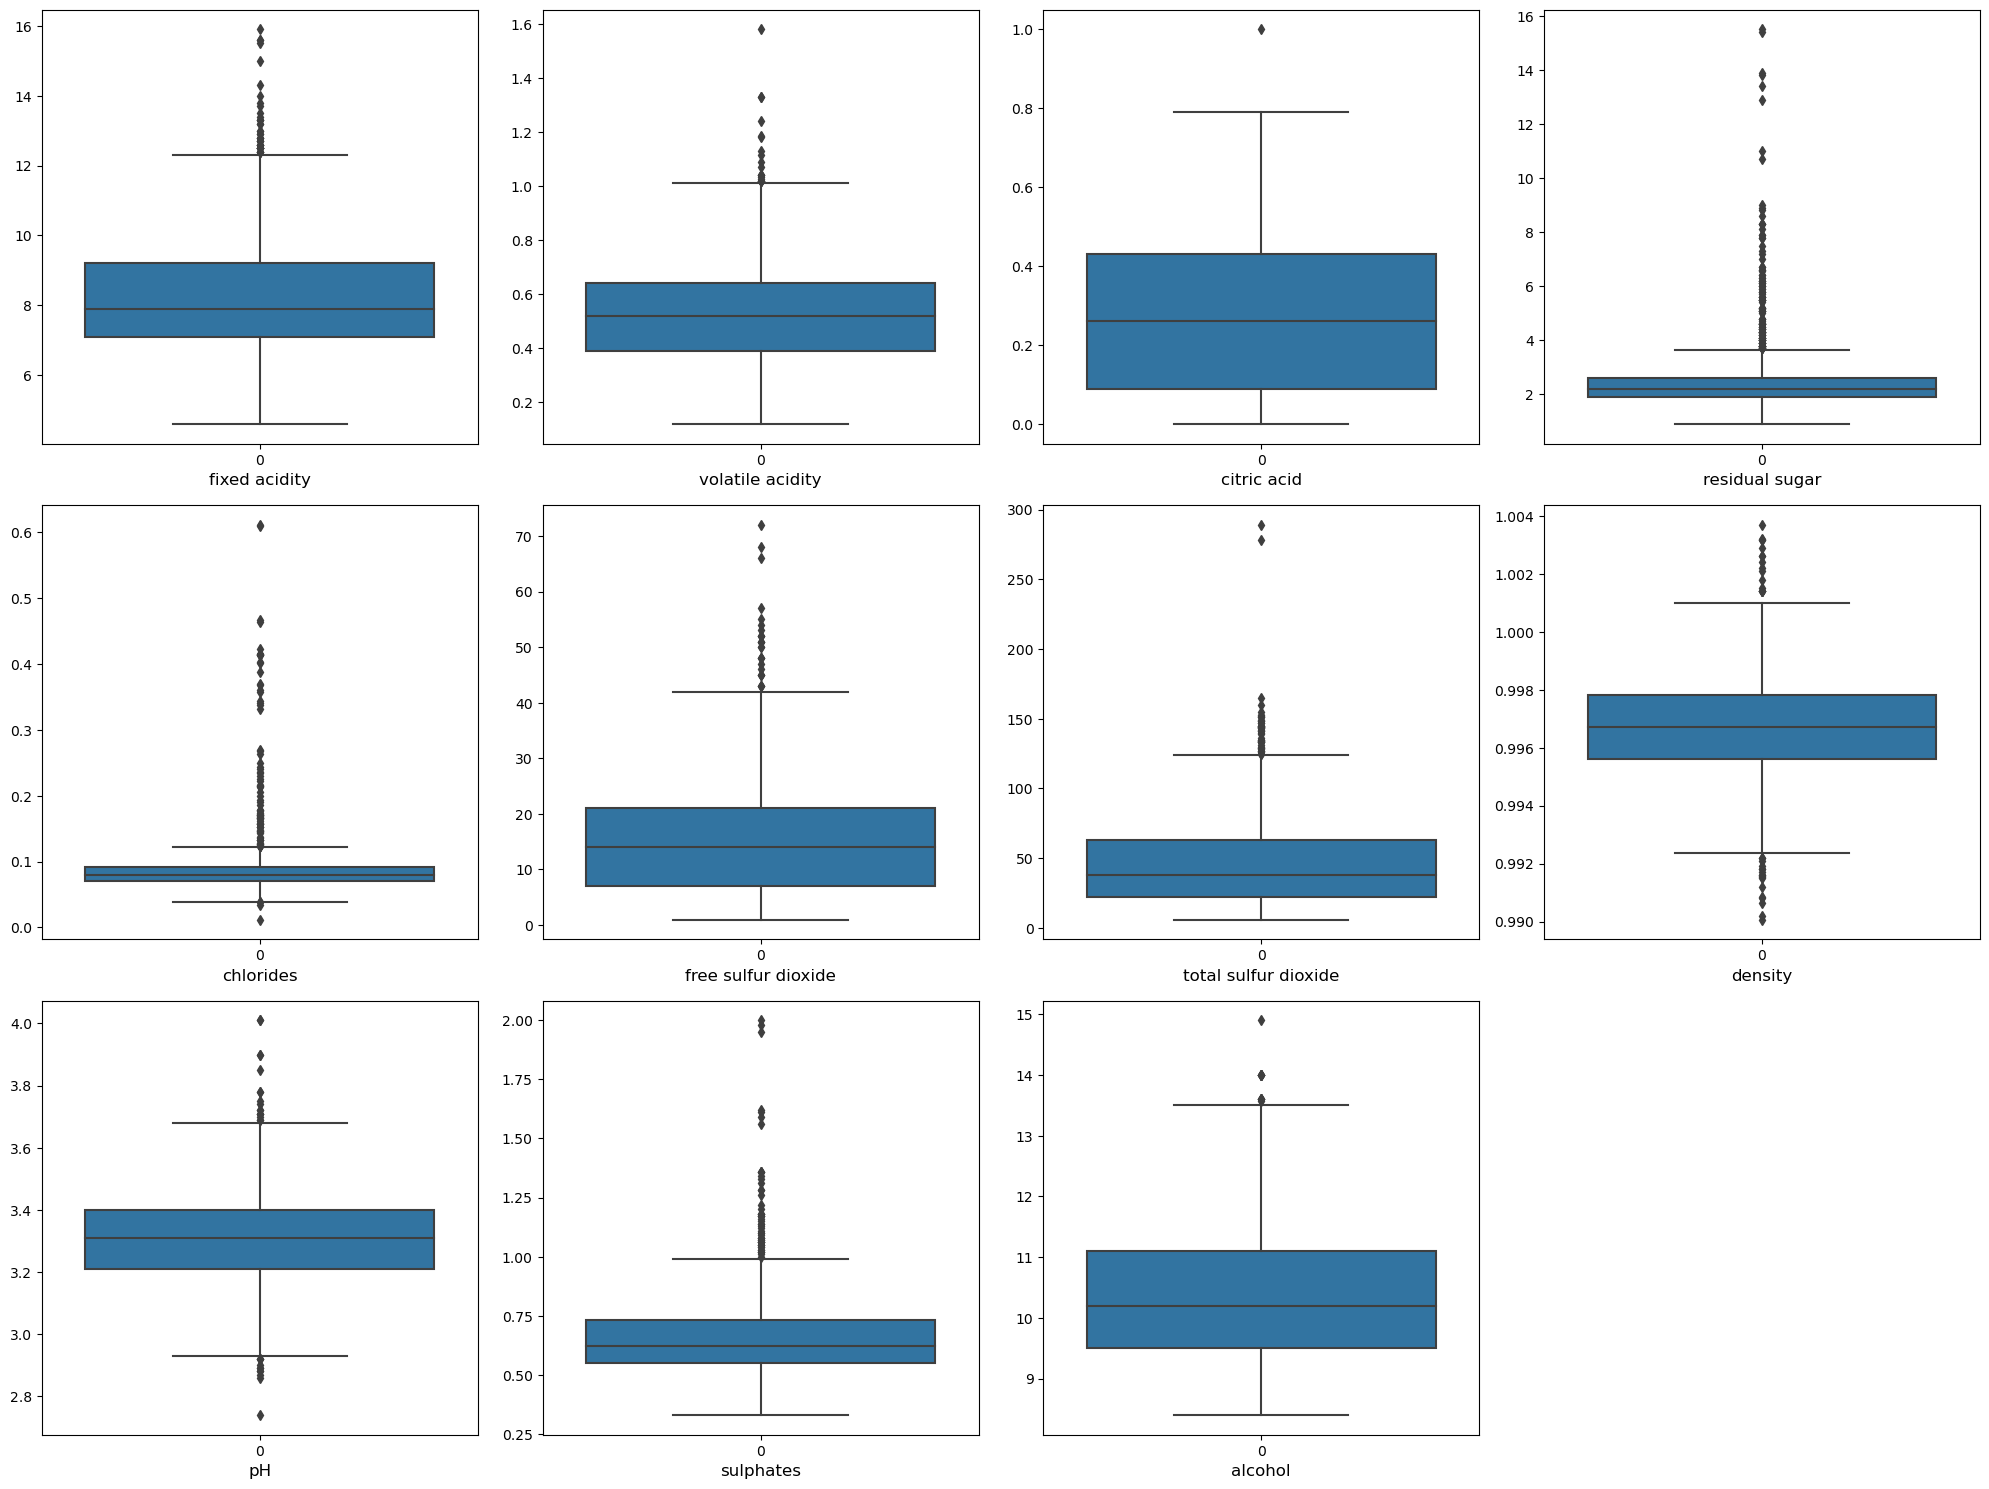

In [20]:
# check for outliers using boxplot 
x=wine_df.drop('quality_label',axis=1)
plt.figure(figsize=(20,15))
plot=1
for col in x:
    if plot<=11:
        ax=plt.subplot(3,4,plot)
        sns.boxplot(x[col])
        plt.xlabel(col,fontsize=12)
    plot+=1
plt.tight_layout()

Observations:  
All features except citric acid and alcohol have more outliers.

In [21]:
# outlier removal by z-score
from scipy.stats import zscore
x=wine_df.drop('quality_label',axis=1)
X=np.cbrt(x)
z=zscore(X)
abs_z=np.abs(z)
filter_z=(abs_z<3).all(axis=1)
wine_df1=wine_df[filter_z]
wine_df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0


In [22]:
print(f'Original DataFrame shape: {wine_df.shape}')
print(f'DataFrame shape after outlier removal: {wine_df1.shape}')
print(f'Number of outliers removed: {wine_df.shape[0] -wine_df1.shape[0] }')

Original DataFrame shape: (1359, 12)
DataFrame shape after outlier removal: (1267, 12)
Number of outliers removed: 92


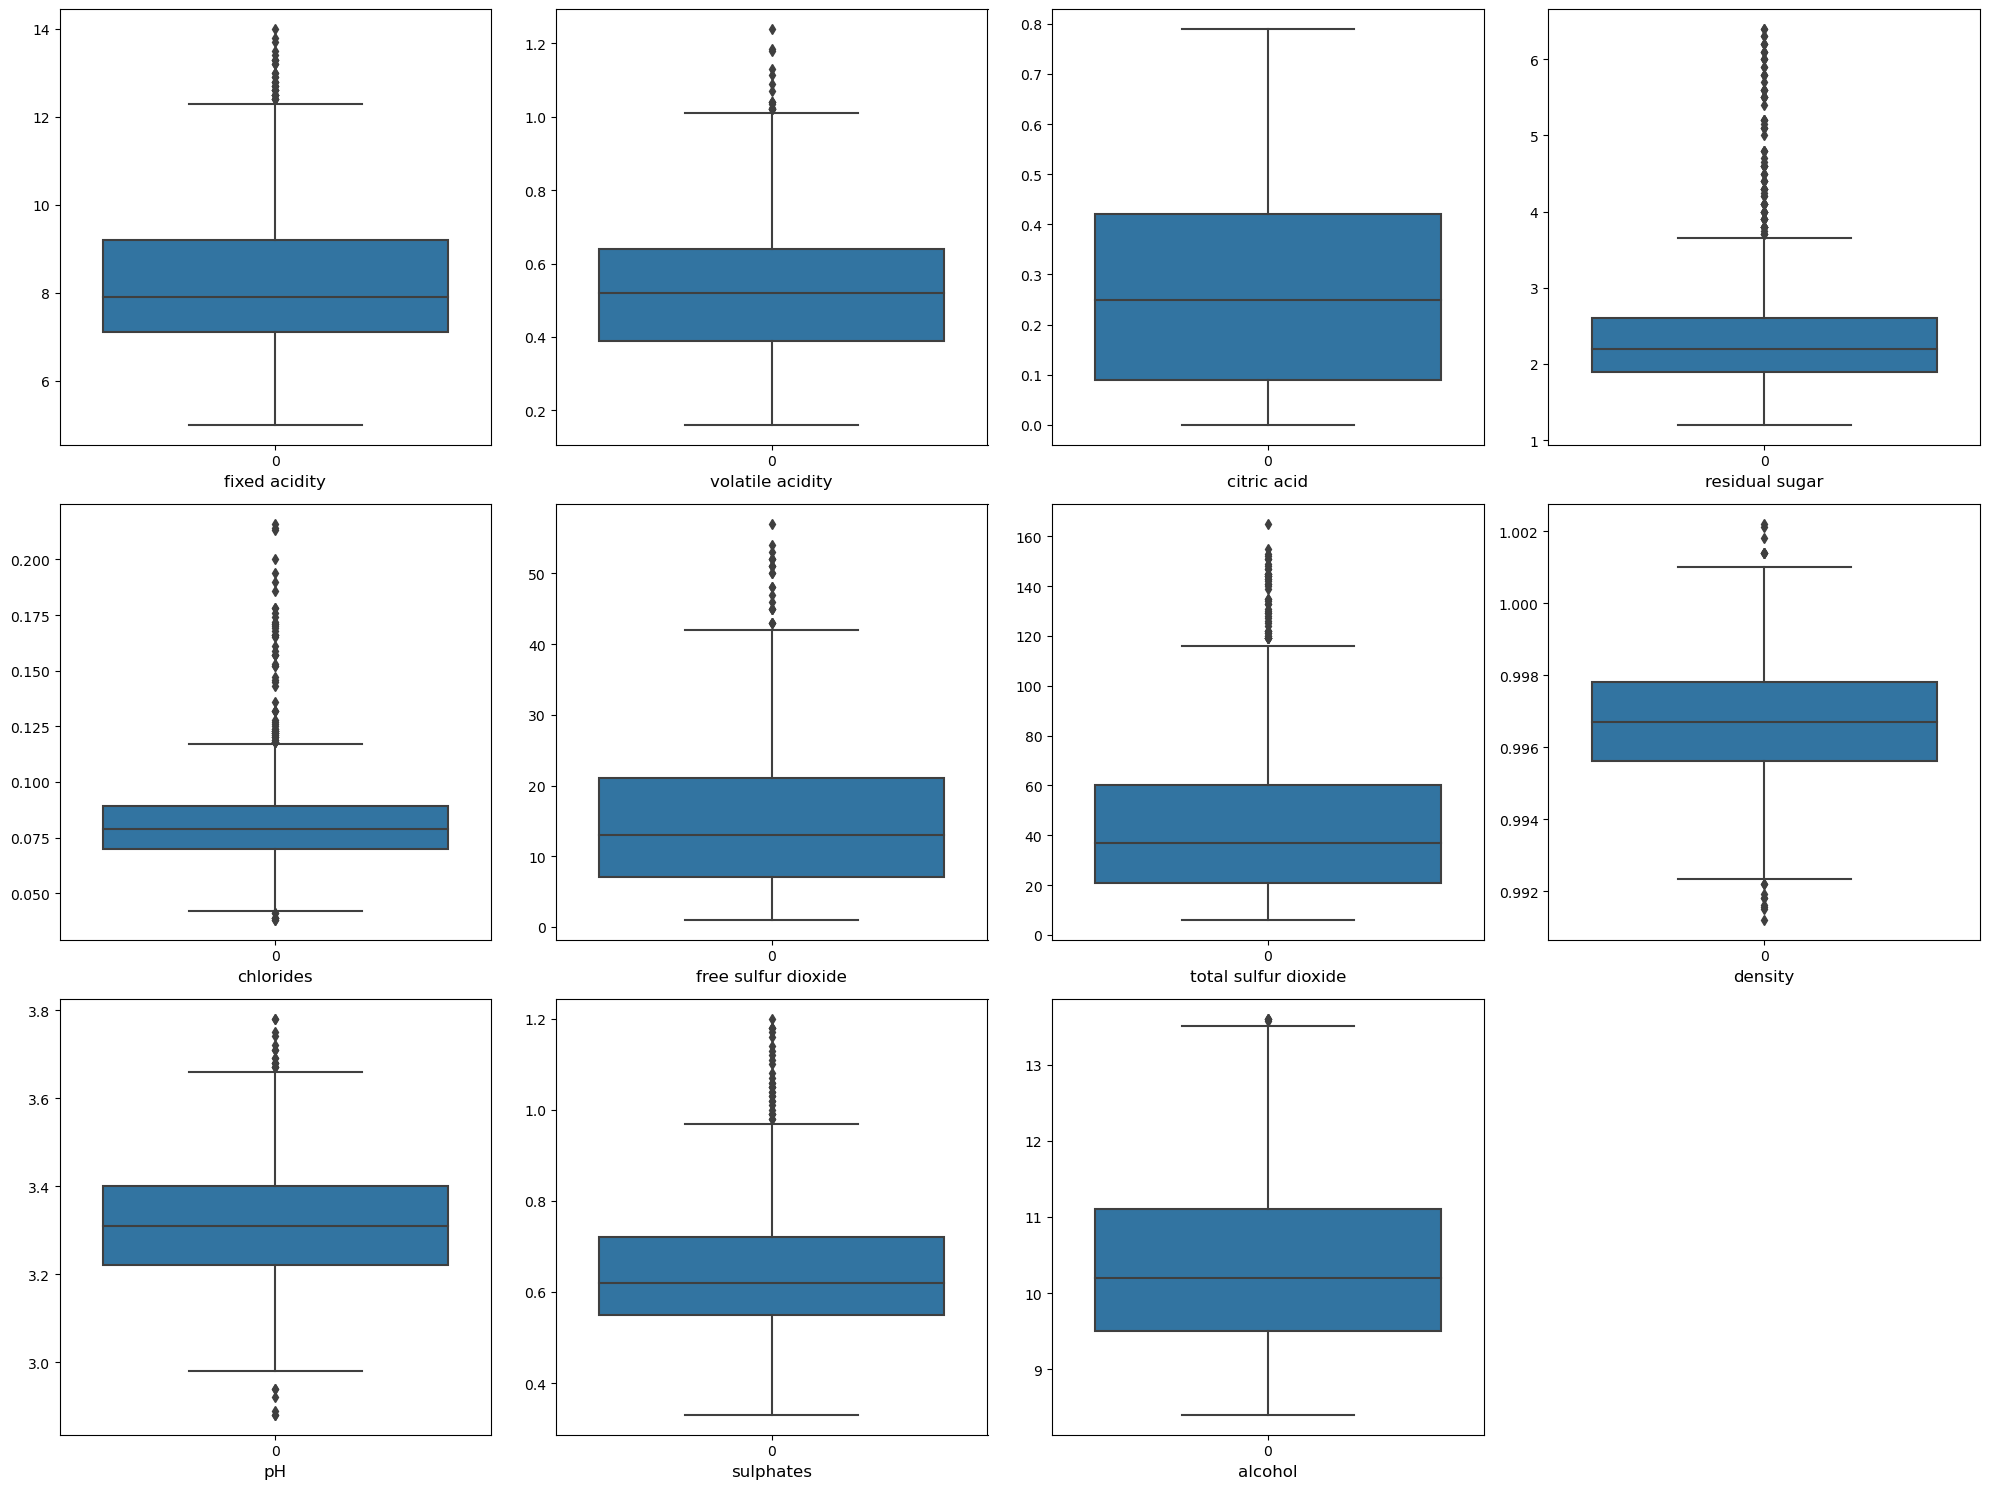

In [23]:
# check for outliers using boxplot after oulier removal
x=wine_df1.drop('quality_label',axis=1)
plt.figure(figsize=(20,15))
plot=1
for col in x:
    if plot<=11:
        ax=plt.subplot(3,4,plot)
        sns.boxplot(x[col])
        plt.xlabel(col,fontsize=12)
    plot+=1
plt.tight_layout()

Observations:  
Outliers are still present even after removal, so we'll proceed with this data itself.

In [24]:
# correlation matrix

x=wine_df1.drop('quality_label',axis=1)
cm= x.corr()
cm

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.282560,0.696415,0.177173,0.171429,-0.129535,-0.088000,0.666843,-0.707036,0.222589,-0.029283
volatile acidity,-0.282560,1.000000,-0.570904,0.051812,0.110580,-0.003287,0.109401,0.008559,0.259123,-0.321483,-0.204595
citric acid,0.696415,-0.570904,1.000000,0.153735,0.087993,-0.065813,0.021771,0.364166,-0.532351,0.311122,0.150950
residual sugar,0.177173,0.051812,0.153735,1.000000,0.146669,0.012884,0.083378,0.339742,-0.079020,0.058100,0.136868
chlorides,0.171429,0.110580,0.087993,0.146669,1.000000,-0.001847,0.094037,0.322132,-0.179335,0.048555,-0.223883
free sulfur dioxide,-0.129535,-0.003287,-0.065813,0.012884,-0.001847,1.000000,0.664248,-0.024902,0.082611,0.055184,-0.092394
total sulfur dioxide,-0.088000,0.109401,0.021771,0.083378,0.094037,0.664248,1.000000,0.118356,-0.043354,-0.025186,-0.273183
density,0.666843,0.008559,0.364166,0.339742,0.322132,-0.024902,0.118356,1.000000,-0.325866,0.150797,-0.480716
pH,-0.707036,0.259123,-0.532351,-0.079020,-0.179335,0.082611,-0.043354,-0.325866,1.000000,-0.071013,0.152198
sulphates,0.222589,-0.321483,0.311122,0.058100,0.048555,0.055184,-0.025186,0.150797,-0.071013,1.000000,0.224703


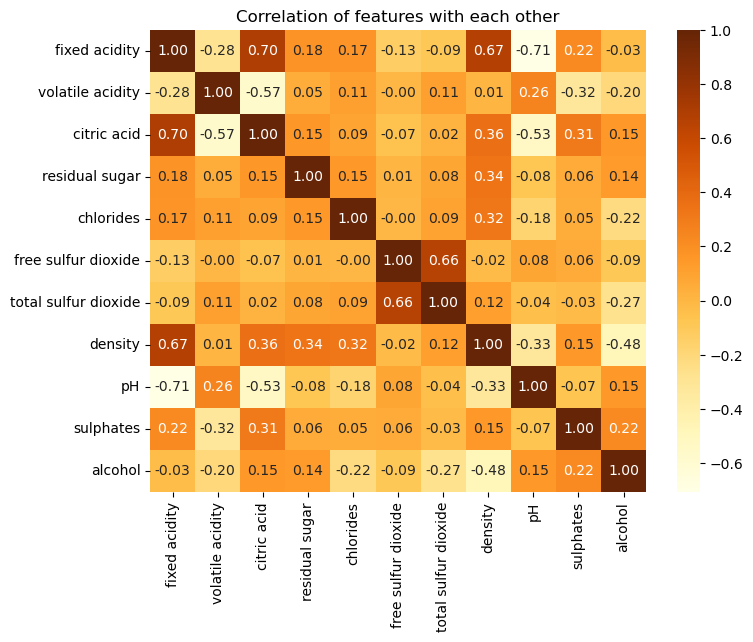

In [25]:
# check for correlation
plt.figure(figsize=(8,6))

sns.heatmap(cm, annot=True,cmap='YlOrBr',fmt='.2f')
plt.title('Correlation of features with each other')
plt.show()

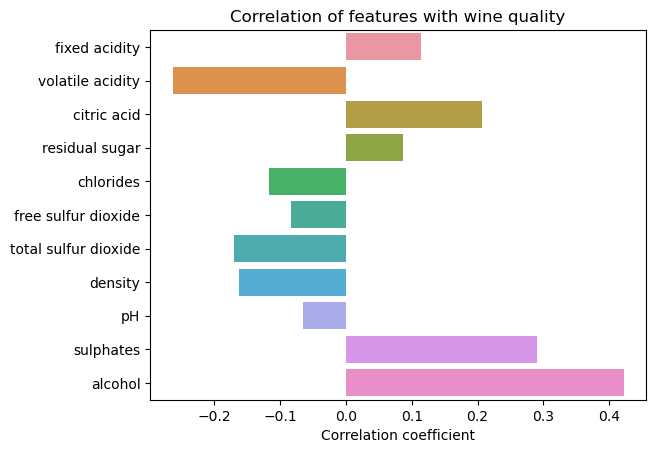

In [26]:
# Correlation of features with wine quality
cm1=wine_df1.corr()
cm1_quality=cm1['quality_label'].drop('quality_label')
sns.barplot(x=cm1_quality.values,y=cm1_quality.index)
plt.title('Correlation of features with wine quality')
plt.xlabel('Correlation coefficient')
plt.show()

Observations:  

Good quality wines are associated with:  
* High content of alcohol, sulphates, citric acid and residual sugar
* Low content of volatile acidity, chlorides, free and total sulfur dioxide, density and pH.

Positive correlation exists between fixed acidity and citric acid (+0.70), free and total sulfur dioxide(+0.66), fixed acidity and density(+0.66).  
Negative correlation exists between fixed acidity and pH (-0.71).  
There can be a problem of multicollinearity, which can be addressed by calculating VIF scores.  

In [27]:
# confirm multicollinearity by vif
x=wine_df1.drop('quality_label',axis=1)
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

vif=pd.DataFrame()
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif.sort_values(by='VIF',ascending=False)

,Features,VIF
0,fixed acidity,8.108649
7,density,6.425051
8,pH,3.273473
10,alcohol,3.237125
2,citric acid,3.139407
6,total sulfur dioxide,2.275754
5,free sulfur dioxide,1.975185
1,volatile acidity,1.819807
3,residual sugar,1.593877
9,sulphates,1.304653


Observations:  
Fixed acidity has correlation with citric acid, density and pH. It also has significantly high VIF of 8.1.  
Density has correlation with Fixed acidity and has high VIF of 6.42.  
Therefore, removing one or both of the features would be ideal to avoid multicollinearity of features. 

In [28]:
# drop fixed acidity column

wine_df1.drop(columns=['fixed acidity'],axis=1, inplace=True)
display(wine_df1.head())
print('\n')
print('Number of columns in the edited dataset: ',wine_df1.shape[1])

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_label
0,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
5,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0




Number of columns in the edited dataset:  11


In [29]:
# confirm multicollinearity by vif after dropping fixed acidity column
x=wine_df1.drop('quality_label',axis=1)
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

vif=pd.DataFrame()
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif.sort_values(by='VIF',ascending=False)

,Features,VIF
1,citric acid,2.750340
6,density,2.568356
9,alcohol,2.310316
5,total sulfur dioxide,2.132892
4,free sulfur dioxide,1.942035
0,volatile acidity,1.806914
7,pH,1.545049
2,residual sugar,1.395157
8,sulphates,1.290933
3,chlorides,1.162399


Observations:  
As fixed acidity is removed, the multicollineairity of density has reduced beyond the usual vif threshold of 5.  
We'll proceed with the data.

# Feature Selection

In [30]:
# Feature selection using SelectKBest

from sklearn.feature_selection import SelectKBest, f_classif

x=wine_df1.drop('quality_label',axis=1)
y=wine_df1['quality_label']

best=SelectKBest(score_func=f_classif,k='all')
best_features=best.fit(x,y)
selectkbest=pd.DataFrame()
selectkbest['Features']=x.columns
selectkbest['Score']=best_features.scores_
print(selectkbest.sort_values(by='Score',ascending=False))

               Features       Score
9               alcohol  273.868723
8             sulphates  115.938355
0      volatile acidity   94.232037
1           citric acid   56.231424
5  total sulfur dioxide   37.686228
6               density   34.454652
3             chlorides   17.623219
2        residual sugar    9.436505
4   free sulfur dioxide    8.727409
7                    pH    5.456078


Observation:  
    Combining the existing knowledge, vif scores and F-values (from SelectKBest), we could select alcohol, sulphates, volatile acidity, citric acid,total sulfur dioxide, chlorides,residual sugar and pH as features for training our model.

In [31]:
# splitting dataset into training and testing sets
x=wine_df1[['alcohol','sulphates','volatile acidity','citric acid','total sulfur dioxide','chlorides','residual sugar','pH']]
y=wine_df1['quality_label']

scaler = StandardScaler()
X_scaled =scaler.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,random_state=67)

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(950, 8) (317, 8) (950,) (317,)


<Axes: xlabel='quality_label', ylabel='count'>

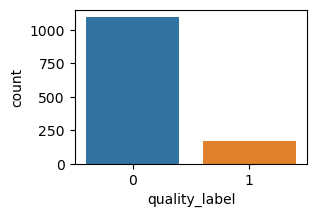

In [32]:
# checking for data imbalance
plt.figure(figsize=(3,2))
sns.countplot(x='quality_label',data=wine_df1)

In [33]:
wine_df1['quality_label'].value_counts()

quality_label
0    1097
1     170
Name: count, dtype: int64

Observation:  
    There is significant class imbalance (good: 1175 and not_good: 184).  
    Since the dataset is small, oversampling can be done using SMOTE(Synthetic Minority Oversampling Technique)to deal with imalance in the dataset.
    

In [34]:
# oversampling by SMOTE

from imblearn.over_sampling import SMOTE as smt
over=smt(random_state=78,k_neighbors=3,sampling_strategy='auto')
X_train,Y_train=over.fit_resample(x_train,y_train)

In [36]:
# check label distribution before and after oversampling
from collections import Counter

print('Label distribution before oversampling: ', Counter(y_train),'\n')

print('Label distribution after oversampling: ', Counter(Y_train))

Label distribution before oversampling:  Counter({0: 819, 1: 131}) 

Label distribution after oversampling:  Counter({0: 819, 1: 819})


In [35]:
# check shape of train and test sets before and after oversampling

print('No. of feature data b/f smote: ', x_train.shape,'and No. of label data b/f smote: ',y_train.shape,'\n')

print('No. of feature data a/f smote: ', X_train.shape,'and no. of label data a/f smote: ', Y_train.shape)

No. of feature data b/f smote:  (950, 8) and No. of label data b/f smote:  (950,) 

No. of feature data a/f smote:  (1638, 8) and no. of label data a/f smote:  (1638,)


Text(0.5, 1.0, 'Label distribution before oversampling')

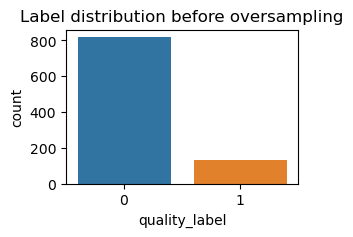

In [37]:
ytrain_df=pd.DataFrame(y_train,columns=['quality_label'])
plt.figure(figsize=(3,2))
sns.countplot(x='quality_label', data=ytrain_df)
plt.title('Label distribution before oversampling')

Text(0.5, 1.0, 'Label distribution after oversampling')

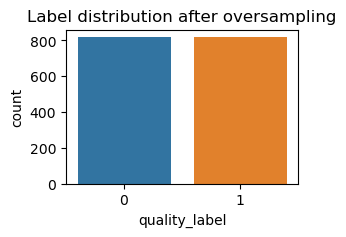

In [38]:
Ytrain_df=pd.DataFrame(Y_train,columns=['quality_label'])
plt.figure(figsize=(3,2))
sns.countplot(x='quality_label', data=Ytrain_df)
plt.title('Label distribution after oversampling')

Observation:  
    Now the class imbalance has been rectified by oversampling.

# MODEL BUILDING & VALIDATION

In [39]:
# define functions for training and evaluation of models

def score(model,X_train,Y_train,x_test,y_test,train=True):
    if train:
        y_pred1= model.predict(X_train)
        print('Accuracy of train set: ',accuracy_score(Y_train,y_pred1))
    else:
        y_pred2= model.predict(x_test)
        print('Accuracy of test set: ',accuracy_score(y_test,y_pred2))
        print(f'\nClassification report of {model} model  :\n\n {classification_report(y_test,y_pred2,digits=2)}')
        
        plt.figure(figsize=(4,3))
        cnf_matrix=metrics.confusion_matrix(y_test,y_pred2)
        cnf_df=pd.DataFrame(cnf_matrix)
        sns.heatmap(cnf_df, annot=True, annot_kws={'size':12},cmap='YlGnBu',fmt='g')
        plt.title(f'Confusion matrix for {model} model')
        plt.xlabel('Predicted Wine Quality')
        plt.ylabel('Actual Wine Quality')
        plt.show()
        
# cross-validation of the model
def cv(model):
    cv_score=cross_val_score(model,x,y,cv=5).mean()
    print (f'\nCross validation score of the {model} model : {cv_score}')
    

Accuracy of train set:  0.8211233211233211
Accuracy of test set:  0.7854889589905363

Classification report of LogisticRegression() model  :

               precision    recall  f1-score   support

           0       0.97      0.78      0.86       278
           1       0.35      0.85      0.49        39

    accuracy                           0.79       317
   macro avg       0.66      0.81      0.68       317
weighted avg       0.90      0.79      0.82       317



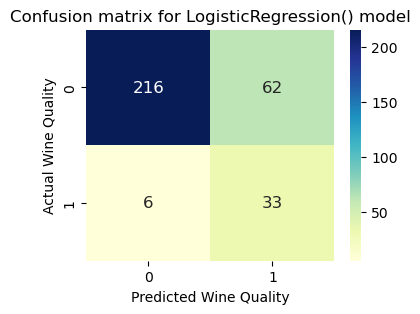


Cross validation score of the LogisticRegression() model : 0.87214528025894


In [40]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,Y_train)

score(lr,X_train,Y_train,x_test,y_test,train=True)
score(lr,X_train,Y_train,x_test,y_test,train=False)

cv(lr)

Accuracy of train set:  0.9212454212454212
Accuracy of test set:  0.7697160883280757

Classification report of KNeighborsClassifier() model  :

               precision    recall  f1-score   support

           0       0.96      0.77      0.85       278
           1       0.32      0.77      0.45        39

    accuracy                           0.77       317
   macro avg       0.64      0.77      0.65       317
weighted avg       0.88      0.77      0.80       317



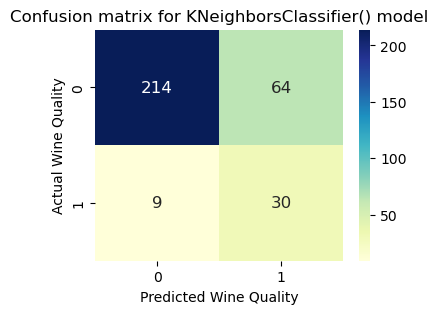


Cross validation score of the KNeighborsClassifier() model : 0.8571130683763343


In [41]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
score(knn,X_train,Y_train,x_test,y_test,train=True)
score(knn,X_train,Y_train,x_test,y_test,train=False)
cv(knn)

Accuracy of train set:  1.0
Accuracy of test set:  0.8264984227129337

Classification report of DecisionTreeClassifier() model  :

               precision    recall  f1-score   support

           0       0.93      0.87      0.90       278
           1       0.36      0.54      0.43        39

    accuracy                           0.83       317
   macro avg       0.65      0.70      0.67       317
weighted avg       0.86      0.83      0.84       317



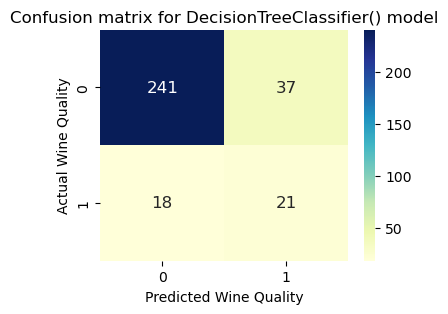


Cross validation score of the DecisionTreeClassifier() model : 0.8263546108119885


In [42]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)

score(dt,X_train,Y_train,x_test,y_test,train=True)
score(dt,X_train,Y_train,x_test,y_test,train=False)
cv(dt)

Accuracy of train set:  1.0
Accuracy of test set:  0.889589905362776

Classification report of RandomForestClassifier() model  :

               precision    recall  f1-score   support

           0       0.95      0.93      0.94       278
           1       0.55      0.62      0.58        39

    accuracy                           0.89       317
   macro avg       0.75      0.77      0.76       317
weighted avg       0.90      0.89      0.89       317



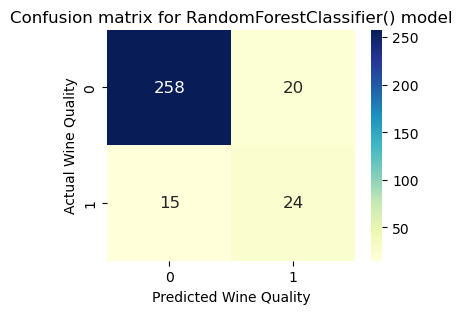


Cross validation score of the RandomForestClassifier() model : 0.8737418692228689


In [43]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)

score(rf,X_train,Y_train,x_test,y_test,train=True)
score(rf,X_train,Y_train,x_test,y_test,train=False)
cv(rf)

Accuracy of train set:  0.8864468864468864
Accuracy of test set:  0.8201892744479495

Classification report of SVC(probability=True) model  :

               precision    recall  f1-score   support

           0       0.96      0.83      0.89       278
           1       0.38      0.77      0.51        39

    accuracy                           0.82       317
   macro avg       0.67      0.80      0.70       317
weighted avg       0.89      0.82      0.84       317



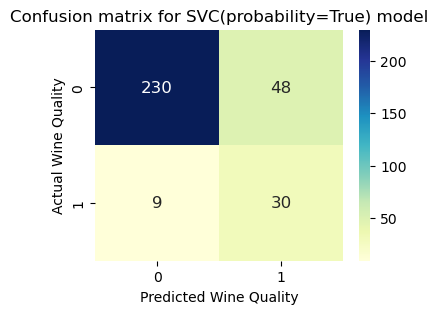


Cross validation score of the SVC(probability=True) model : 0.8658242818461922


In [44]:
# SVM
from sklearn.svm import SVC
svc=SVC(probability=True)
svc.fit(X_train,Y_train)

score(svc,X_train,Y_train,x_test,y_test,train=True)
score(svc,X_train,Y_train,x_test,y_test,train=False)
cv(svc)

Accuracy of train set:  0.938949938949939
Accuracy of test set:  0.8580441640378549

Classification report of GradientBoostingClassifier() model  :

               precision    recall  f1-score   support

           0       0.96      0.88      0.92       278
           1       0.45      0.72      0.55        39

    accuracy                           0.86       317
   macro avg       0.70      0.80      0.74       317
weighted avg       0.89      0.86      0.87       317



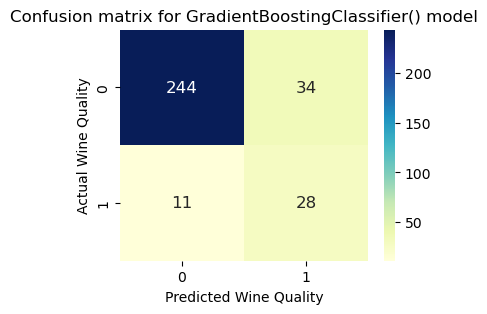


Cross validation score of the GradientBoostingClassifier() model : 0.8729326818337431


In [45]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(X_train,Y_train)

score(gbc,X_train,Y_train,x_test,y_test,train=True)
score(gbc,X_train,Y_train,x_test,y_test,train=False)
cv(gbc)

Accuracy of train set:  1.0
Accuracy of test set:  0.8643533123028391

Classification report of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=88, ...) model  :

               precision    recall  f1-score   support

           0       0.94      0.91      0.92       278
           1       0.46     

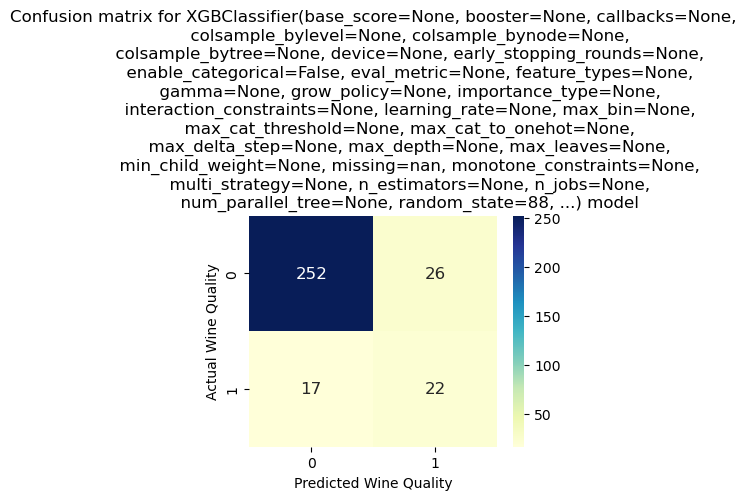


Cross validation score of the XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=88, ...) model : 0.864246366437397


In [46]:
# XGBoost
import xgboost as xgb
xg=xgb.XGBClassifier(random_state=88)
xg.fit(X_train,Y_train)

score(xg,X_train,Y_train,x_test,y_test,train=True)
score(xg,X_train,Y_train,x_test,y_test,train=False)
cv(xg)

Observations:  
Models can easily classify 'not-good' wines.  
Models are struggling to find good wines even after balancing the dataset. So 'precision-recall-curve' could be used to find the better model which classifies 'good' wines more correctly.    

F1 score of Logistic Regression model is  0.49253731343283585
F1 score of Decision Tree model is  0.3689320388349514
F1 score of KNN model is  0.4511278195488722
F1 score of Random Forest model is  0.5882352941176471
F1 score of SVC model is  0.5128205128205128
F1 score of Gradient Boosting model is  0.5599999999999999
F1 score of XGBoost model is  0.5057471264367815


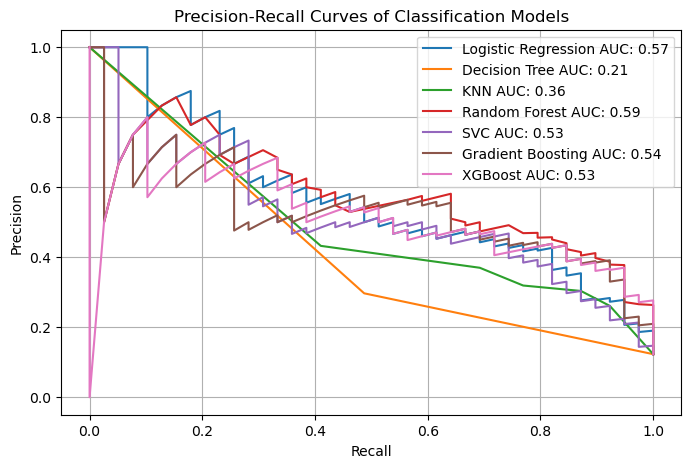

In [47]:
# precision-recall-curve

from sklearn.metrics import precision_score, recall_score, precision_recall_curve, f1_score, average_precision_score

models = {'Logistic Regression': lr,'Decision Tree': dt,'KNN': knn, 'Random Forest': rf,'SVC': svc,
          'Gradient Boosting': gbc,'XGBoost': xg}


def pr_curve(data,x_test,y_test):
    
    plt.figure(figsize=(8,5))
    
    for name, model in models.items():
        
        model.fit(X_train,Y_train)
        y_pred=model.predict(x_test)
        y_prob=model.predict_proba(x_test)[:,1]
        fs=f1_score(y_test,y_pred)
        print(f'F1 score of {name} model is  {fs}')

    
        precision, recall,threshold = precision_recall_curve(y_test,y_prob)
        aps=average_precision_score(y_test,y_prob)
        plt.plot(recall, precision,label=f'{name} AUC: {aps:.2f}')

    
    plt.title('Precision-Recall Curves of Classification Models')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.grid(True)
    plt.legend(loc='best')   
    plt.show()

pr_curve(models,x_test,y_test)

Observations:  
Random Forest model has the highest F1 score indicating that the model classify the good wines better than other models. Comparitively higher F1 score also tells us that the model has less false positives and false negatives than the others.   
The Random Forest model (red curve) has the highest AUC (0.59) in the precision recall plot and also the highest accuracy score of 88.95%.


In [51]:
# 1. Hyperparameter tuning of the selected model (Random Forest) using GridSearchCV
from sklearn.model_selection import GridSearchCV

params={'n_estimators': [25,35,50], 'criterion':['gini','entropy'], 'max_depth':range(10,30,5), 
        'min_samples_leaf':[1,2,4], 'max_leaf_nodes':[10,15,20]}

gs=GridSearchCV(estimator=rf,param_grid=params,scoring='accuracy',cv=5)

gs.fit(X_train,Y_train)

print(f'Best parameters for Random Forest model: {gs.best_params_} and best score is : {gs.best_score_}')

Best parameters for Random Forest model: {'criterion': 'gini', 'max_depth': 20, 'max_leaf_nodes': 20, 'min_samples_leaf': 1, 'n_estimators': 35} and best score is : 0.8711885582158574


Accuracy of train set:  0.891941391941392
Accuracy of test set:  0.8548895899053628

Classification report of RandomForestClassifier(max_depth=20, max_leaf_nodes=20, n_estimators=35) model  :

               precision    recall  f1-score   support

           0       0.96      0.87      0.91       278
           1       0.45      0.77      0.57        39

    accuracy                           0.85       317
   macro avg       0.71      0.82      0.74       317
weighted avg       0.90      0.85      0.87       317



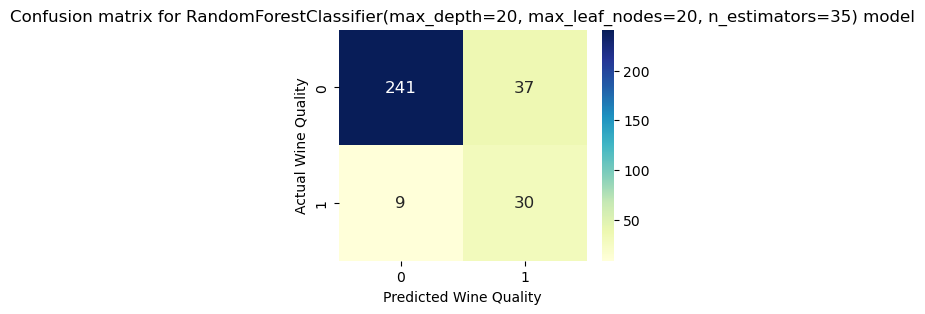


Cross validation score of the RandomForestClassifier(max_depth=20, max_leaf_nodes=20, n_estimators=35) model : 0.8839812019544988


In [52]:
rf1=gs.best_estimator_
rf1.fit(X_train,Y_train)

score(rf1,X_train,Y_train,x_test,y_test,train=True)
score(rf1,X_train,Y_train,x_test,y_test,train=False)
cv(rf1)

Observation:   
    Number of false negatives detected have reduced from 15 to 9 after hp tuning.  
    Accuracy of training and test sets are not having very big difference, which says that the model is not overfitting.

# Overall Summary


* Good quality wines are associated with:

    * High content of alcohol, sulphates, citric acid and residual sugar
    * Low content of volatile acidity, chlorides, free and total sulfur dioxide, density and pH.
    

* The dataset was imbalanced, with very less number of good quality wine data.

* Out of all the trained models, Random Forest gave the better results after tuning. 


In [53]:
# Save random forest model
pickle.dump(rf1, open('wine_rf_model1.pkl','wb'))